#Telecom X - Análisis de Evasión de Clientes ONE

> Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?
✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.





#1.Proceso de Transformación y Tratamiento de Datos

---


*   🔗 Documentación de DataFrame.info()
🔗 Documentación de DataFrame.dtypes()

*   🔗 Documentación de pandas.unique()
🔗 Documentación de pandas.Series.dt.normalize()

*   https://www.aluracursos.com/blog/manipulacion-de-strings-en-pandas-lower-replace-startswith-y-contains

*   Columna de cuentas diarias : Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

*  La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

*  Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.










In [1]:
import pandas as pd

# URL del archivo JSON crudo en GitHub (reemplaza con la ruta real)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Carga los datos directamente desde la URL
df = pd.read_json(url)

# Inspecciona las primeras filas del DataFrame
print(df.head())
print(df.info())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [2]:
# Cargar datos
df = pd.read_json(url)

# Explorar estructura
print("=== Información del DataFrame ===")
df.info()

print("\n=== Tipos de datos por columna ===")
print(df.dtypes)

print("\n=== Primeras filas del DataFrame ===")
print(df.head())

=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

=== Tipos de datos por columna ===
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

=== Primeras filas del DataFrame ===
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'P

In [3]:
import pandas as pd

# URL del JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar JSON
df = pd.read_json(url)

# --- Normalizar las columnas con diccionarios ---
df_normalizado = df.copy()

# Extraer subcampos de cada columna de diccionario
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['customer'])).drop(columns=['customer'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['phone'])).drop(columns=['phone'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['internet'])).drop(columns=['internet'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['account'])).drop(columns=['account'])

# --- 1. Revisar valores ausentes ---
print("=== Valores nulos por columna ===")
print(df_normalizado.isnull().sum())

# --- 2. Registros duplicados ---
duplicados = df_normalizado.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")

# --- 3. Valores únicos para detectar inconsistencias ---
print("\n=== Valores únicos en columnas categóricas ===")
for col in df_normalizado.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_normalizado[col].unique()[:8]}")  # muestra primeros 8 valores

# --- 4. Si hubiera fechas, normalizarlas ---
for col in df_normalizado.select_dtypes(include=['datetime64[ns]']).columns:
    df_normalizado[col] = df_normalizado[col].dt.normalize()




=== Valores nulos por columna ===
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Registros duplicados: 0

=== Valores únicos en columnas categóricas ===
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No inte

In [4]:
# --- 1. Normalizar mayúsculas/minúsculas ---
for col in df_normalizado.select_dtypes(include=['object']).columns:
    df_normalizado[col] = df_normalizado[col].str.lower()

# --- 2. Reemplazar inconsistencias ---
# Ejemplo: convertir "no internet service" en "no"
if "OnlineSecurity" in df_normalizado.columns:
    df_normalizado["OnlineSecurity"] = df_normalizado["OnlineSecurity"].replace({
        "no internet service": "no"
    })

if "OnlineBackup" in df_normalizado.columns:
    df_normalizado["OnlineBackup"] = df_normalizado["OnlineBackup"].replace({
        "no internet service": "no"
    })

# --- 3. Eliminar espacios en blanco extra ---
for col in df_normalizado.select_dtypes(include=['object']).columns:
    df_normalizado[col] = df_normalizado[col].str.strip()

# --- 4. Correcciones usando startswith / contains ---
# Unificar valores en Contract
if "Contract" in df_normalizado.columns:
    mask = df_normalizado["Contract"].str.startswith("month")
    df_normalizado.loc[mask, "Contract"] = "month-to-month"

    mask = df_normalizado["Contract"].str.contains("year")
    df_normalizado.loc[mask, "Contract"] = df_normalizado.loc[mask, "Contract"].replace({
        "one year": "1 year",
        "two year": "2 years"
    })

# --- 5. Verificación final ---
for col in ["OnlineSecurity", "OnlineBackup", "Contract", "InternetService"]:
    if col in df_normalizado.columns:
        print(f"\nValores únicos en {col}: {df_normalizado[col].unique()}")



Valores únicos en OnlineSecurity: ['no' 'yes']

Valores únicos en OnlineBackup: ['yes' 'no']

Valores únicos en Contract: ['1 year' 'month-to-month' '2 years']

Valores únicos en InternetService: ['dsl' 'fiber optic' 'no']


In [5]:
print(df_normalizado.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [6]:
# Convertir a float (por si acaso) y crear la nueva columna
df_normalizado['Cuentas_Diarias'] = df_normalizado['Charges.Monthly'].astype(float) / 30

# Mostrar ejemplo para validar
print(df_normalizado[['Charges.Monthly', 'Cuentas_Diarias']].head(10))


   Charges.Monthly  Cuentas_Diarias
0            65.60         2.186667
1            59.90         1.996667
2            73.90         2.463333
3            98.00         3.266667
4            83.90         2.796667
5            69.40         2.313333
6           109.70         3.656667
7            84.65         2.821667
8            48.20         1.606667
9            90.45         3.015000


In [7]:
# Columnas con valores "yes"/"no" a convertir
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in cols_binarias:
    if col in df_normalizado.columns:
        df_normalizado[col] = df_normalizado[col].map({'yes': 1, 'no': 0})


In [8]:
df_normalizado.rename(columns={
    'Churn': 'Evasion',
    'Charges.Monthly': 'Facturacion_Mensual',
    'Charges.Total': 'Facturacion_Total',
    'tenure': 'Meses_Cliente',
    'Contract': 'Contrato',
    'PaymentMethod': 'Metodo_Pago',
    'MonthlyCharges': 'Facturacion_Mensual',
    'TotalCharges': 'Facturacion_Total',
    'Cuentas_Diarias': 'Facturacion_Diaria',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Proteccion_Dispositivos',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
}, inplace=True)


#Análisis Descriptivo

---
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

---




In [9]:
# Análisis descriptivo para variables numéricas
descripcion_num = df_normalizado.describe().transpose()
print(descripcion_num)

# Para incluir también variables categóricas, puedes usar:
descripcion_obj = df_normalizado.describe(include=['object'])
print(descripcion_obj)


                          count       mean        std        min        25%  \
Evasion                  7043.0   0.265370   0.441561   0.000000   0.000000   
SeniorCitizen            7267.0   0.162653   0.369074   0.000000   0.000000   
Partner                  7267.0   0.484106   0.499782   0.000000   0.000000   
Dependents               7267.0   0.300124   0.458343   0.000000   0.000000   
Meses_Cliente            7267.0  32.346498  24.571773   0.000000   9.000000   
PhoneService             7267.0   0.902711   0.296371   0.000000   1.000000   
MultipleLines            6560.0   0.467226   0.498963   0.000000   0.000000   
Seguridad_Online         7267.0   0.285950   0.451897   0.000000   0.000000   
Backup_Online            7267.0   0.344571   0.475261   0.000000   0.000000   
Proteccion_Dispositivos  5686.0   0.438094   0.496196   0.000000   0.000000   
Soporte_Tecnico          5686.0   0.370032   0.482855   0.000000   0.000000   
Streaming_TV             5686.0   0.490679   0.49995

/tmp/ipython-input-1787505704.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette=['green', 'red'])


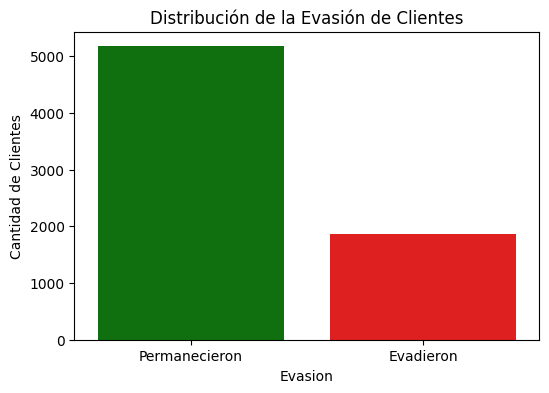

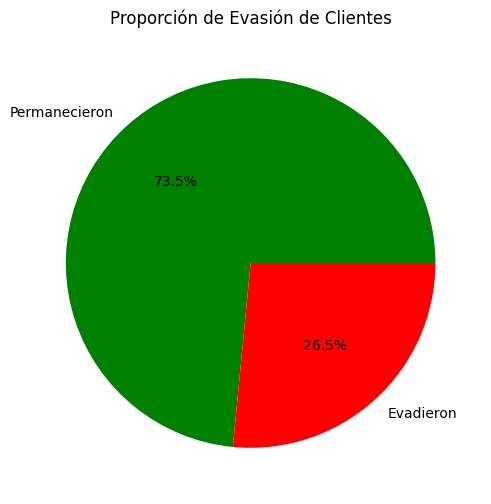

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar valores de la columna Evasion (0 = no evadió, 1 = evadió)
conteo = df_normalizado['Evasion'].value_counts()

# Graficar barra
plt.figure(figsize=(6,4))
sns.barplot(x=conteo.index, y=conteo.values, palette=['green', 'red'])
plt.xticks([0,1], ['Permanecieron', 'Evadieron'])
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de la Evasión de Clientes')
plt.show()

# Graficar pastel
plt.figure(figsize=(6,6))
plt.pie(conteo.values, labels=['Permanecieron', 'Evadieron'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proporción de Evasión de Clientes')
plt.show()


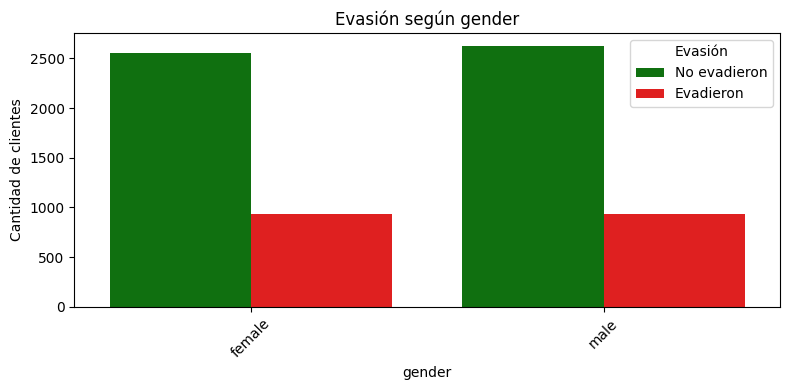

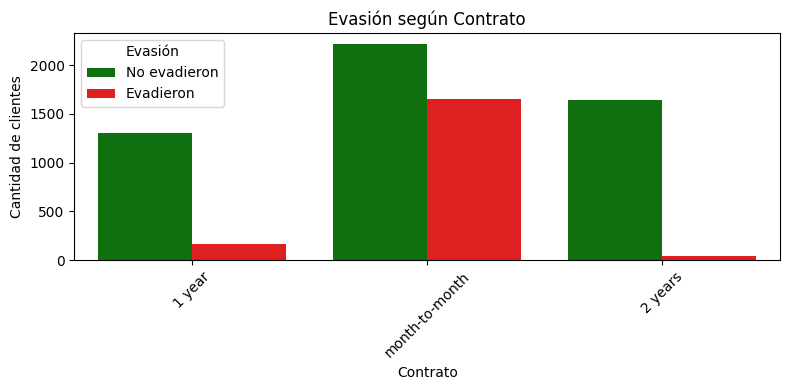

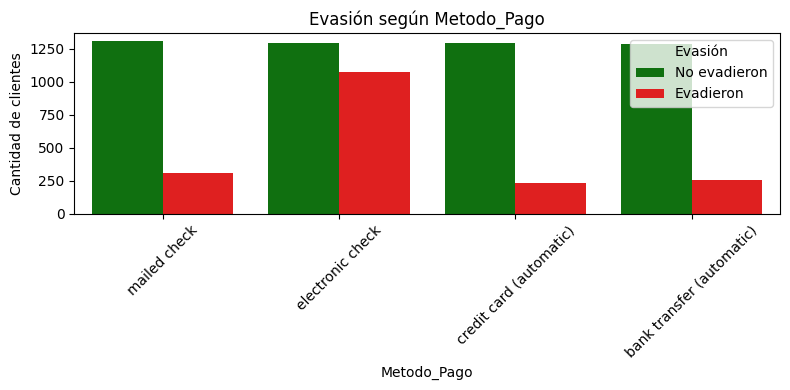

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas a analizar
categoricas = ['gender', 'Contrato', 'Metodo_Pago']

for var in categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_normalizado, x=var, hue='Evasion', palette=['green', 'red'])
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Evasión', labels=['No evadieron', 'Evadieron'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Cantidad de filas limpias para análisis: 7032
Conteo evasión:
evasion
0    5163
1    1869
Name: count, dtype: int64


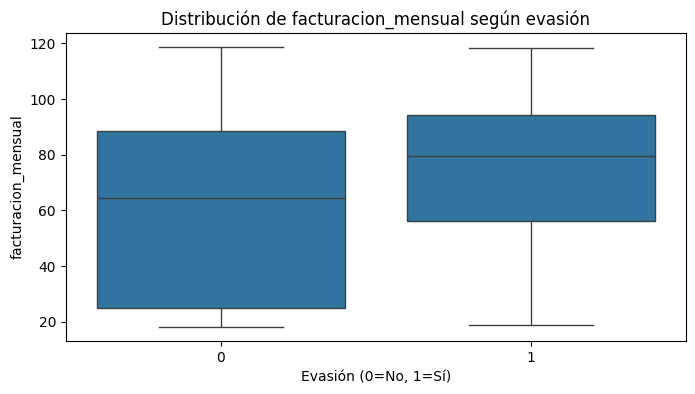

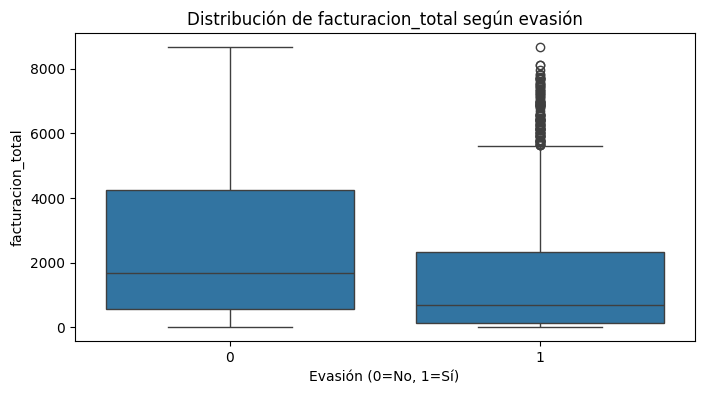

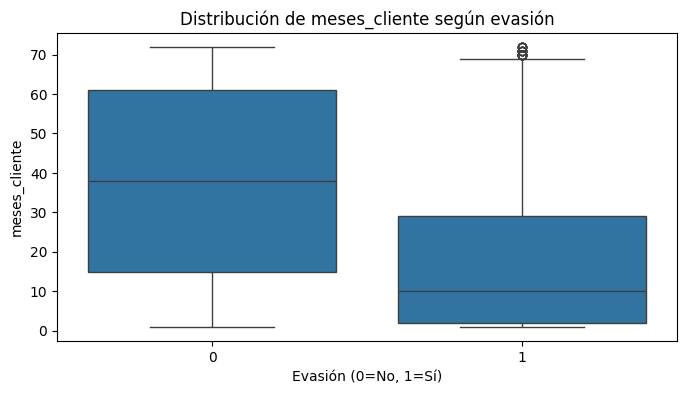

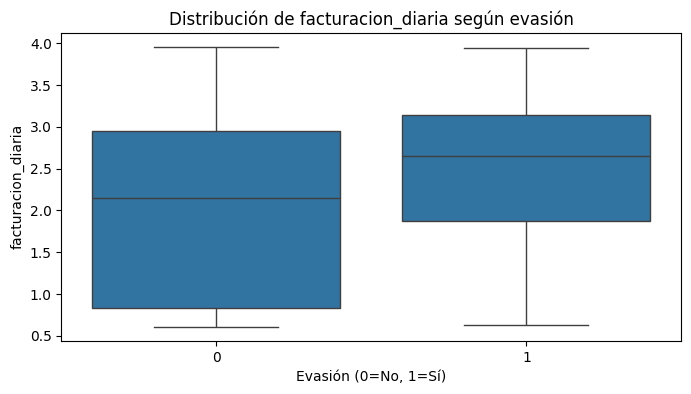

        facturacion_mensual                                             \
                      count       mean        std    min    25%    50%   
evasion                                                                  
0                    5163.0  61.307408  31.094557  18.25  25.10  64.45   
1                    1869.0  74.441332  24.666053  18.85  56.15  79.65   

                        facturacion_total               ... meses_cliente  \
            75%     max             count         mean  ...           75%   
evasion                                                 ...                 
0        88.475  118.75            5163.0  2555.344141  ...          61.0   
1        94.200  118.35            1869.0  1531.796094  ...          29.0   

              facturacion_diaria                                          \
          max              count      mean       std       min       25%   
evasion                                                                    
0        72.0  

In [18]:
#Corrección y apoyo con IA generativa chat gpt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

# Aplanar columnas anidadas
df_normalizado = df.join(pd.json_normalize(df['customer'])).drop(columns=['customer'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['phone'])).drop(columns=['phone'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['internet'])).drop(columns=['internet'])
df_normalizado = df_normalizado.join(pd.json_normalize(df_normalizado['account'])).drop(columns=['account'])

# Convertir nombres columnas a minúsculas
df_normalizado.columns = df_normalizado.columns.str.lower()

# Limpiar y corregir valores de ciertas columnas
def clean_replace_col(df, col_name):
    if col_name in df.columns:
        df[col_name] = df[col_name].astype(str).str.lower().str.strip()
        df[col_name] = df[col_name].replace({'no internet service': 'no'})

for col in ['onlinebackup', 'onlinesecurity']:
    clean_replace_col(df_normalizado, col)

# Renombrar columnas para mayor claridad
renombrar_cols = {
    'churn': 'evasion',
    'charges.monthly': 'facturacion_mensual',
    'charges.total': 'facturacion_total',
    'tenure': 'meses_cliente',
    'contract': 'contrato',
    'paymentmethod': 'metodo_pago',
    'onlinebackup': 'backup_online',
    'onlinesecurity': 'seguridad_online',
    'deviceprotection': 'proteccion_dispositivos',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'streaming_tv',
    'streamingmovies': 'streaming_peliculas',
}
df_normalizado.rename(columns=renombrar_cols, inplace=True)

# Limpiar y mapear columna 'evasion' a binario
df_normalizado['evasion'] = df_normalizado['evasion'].astype(str).str.lower().str.strip()
df_normalizado['evasion'] = df_normalizado['evasion'].map({'yes': 1, 'no': 0})

# Eliminar filas sin valor válido en 'evasion'
df_normalizado = df_normalizado.dropna(subset=['evasion'])
df_normalizado['evasion'] = df_normalizado['evasion'].astype(int)

# Crear columna facturacion_diaria
if 'facturacion_mensual' in df_normalizado.columns:
    df_normalizado['facturacion_mensual'] = pd.to_numeric(df_normalizado['facturacion_mensual'], errors='coerce')
    df_normalizado['facturacion_diaria'] = df_normalizado['facturacion_mensual'] / 30

# Definir variables numéricas a analizar (si existen)
variables_num = [col for col in ['facturacion_mensual', 'facturacion_total', 'meses_cliente', 'facturacion_diaria'] if col in df_normalizado.columns]

# Convertir variables numéricas a float
for col in variables_num:
    df_normalizado[col] = pd.to_numeric(df_normalizado[col], errors='coerce')

# Eliminar filas con nulos en columnas numéricas y en evasión (ya limpio, pero para asegurar)
df_normalizado = df_normalizado.dropna(subset=variables_num + ['evasion'])

print("Cantidad de filas limpias para análisis:", len(df_normalizado))
print("Conteo evasión:")
print(df_normalizado['evasion'].value_counts())

# Graficar boxplots
for var in variables_num:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_normalizado, x='evasion', y=var)
    plt.title(f'Distribución de {var} según evasión')
    plt.xlabel('Evasión (0=No, 1=Sí)')
    plt.ylabel(var)
    plt.show()

# Mostrar estadística descriptiva agrupada por evasión
desc_por_evasion = df_normalizado.groupby('evasion')[variables_num].describe()
print(desc_por_evasion)


# 📄 Informe final

## Introducción

El objetivo de este análisis es con respecto al Challenge 2 de la ruta de Científici de Datos de ONE es identificar patrones y factores asociados con la evasión de clientes (churn) en para Telecom X, con el fin de proporcionar insights que ayuden a reducir la pérdida de clientes ( es decir retenerlos).

## Limpieza y Tratamiento de Datos

Se importaron y normalizaron datos provenientes de una API pública en formato JSON, el cuál contenía sub diccionarios que no ayudaban al tramiento de los datos y transformaciones.  
Por ello,se estandarizaron columnas y valores, se convirtieron variables categóricas a binarias y se crearon nuevas variables relevantes como la "facturación diaria".  
Se eliminaron registros con datos faltantes en variables clave para asegurar la calidad del análisis.

## Análisis Exploratorio de Datos

- La evasión presenta un porcentaje significativo del 26.5%, con diferencias claras en la facturación y duración del cliente.  
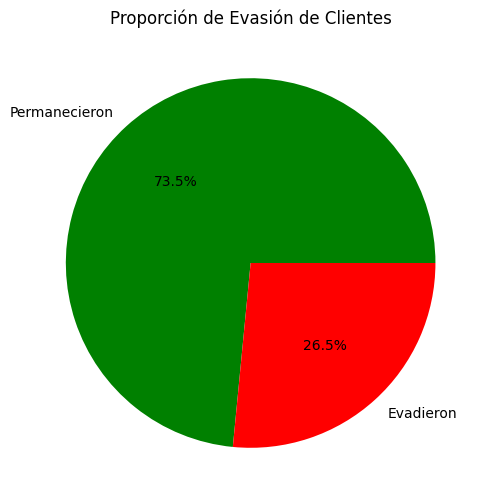
- Los clientes con contratos a corto plazo tienen una mayor tendencia a abandonar el servicio.  
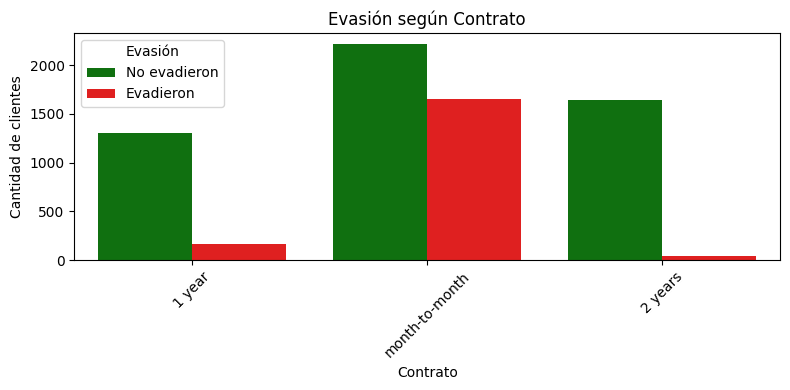
- Las variables numéricas muestran que los clientes que evaden tienden a tener mayor facturación diaria y menor tiempo en la empresa.

### Interpretación del Análisis Descriptivo de Variables Numéricas según Evasión

- **Facturación mensual:**  
  Los clientes que evadieron tienen un gasto promedio mensual mayor (74.44) en comparación con los que permanecieron (61.31). Esto puede indicar que los clientes con facturas más altas podrían tener mayor propensión a cancelar el servicio, tal vez buscando opciones más económicas.

- **Facturación diaria:**  
  Similarmente, la facturación diaria promedio es mayor en clientes que abandonaron (2.48) frente a los que se mantienen (2.04). Este dato refuerza la idea de que el costo diario del servicio puede ser un factor relevante en la decisión de evasión.

  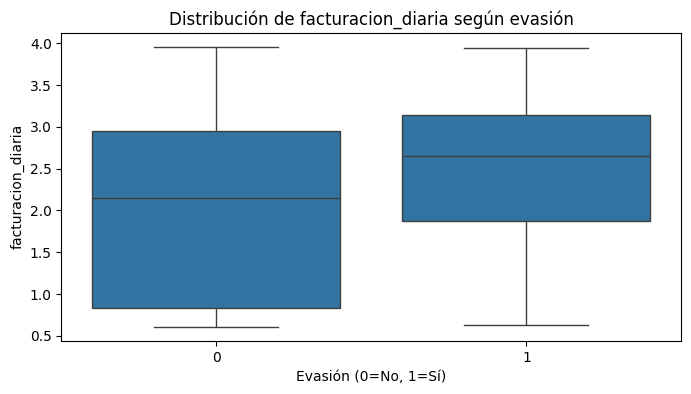

- **Meses como cliente:**  
  La antigüedad promedio de los clientes que evadieron es considerablemente menor (29 meses) que la de quienes permanecen (61 meses). Esto sugiere que la mayor parte de la evasión ocurre en clientes relativamente nuevos, enfatizando la importancia de estrategias de retención temprana.


## Conclusiones e Insights

- La duración del cliente y tipo de contrato son factores clave en la evasión.  
- La facturación diaria puede ser un indicador temprano de riesgo de evasión.  
- Variables demográficas mostraron menor impacto directo pero pueden ser exploradas más a fondo.

## Recomendaciones

- Implementar campañas específicas para clientes con contratos mes a mes.  
- Monitorear clientes con alta facturación diaria y poca antigüedad.  
- Mejorar el soporte y métodos de pago, alineándolos con perfiles de clientes en riesgo.  
- Desarrollar modelos predictivos para anticipar la evasión y tomar acciones preventivas.

---

Este análisis sienta una base sólida para continuar trabajando en la retención de clientes en Telecom X.